<a href="https://colab.research.google.com/github/plaban1981/TMLC/blob/main/Patient_Survival_Detection_using_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
file_path = "/content/drive/MyDrive/TMLC/Patient_Survival_Detection/Dataset.csv"

## Import Required Libraries

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* Bias is a certain assumption of each and every layer
* Main aim here in Neural Network is to abe able to learn about proper weights associated with each features.






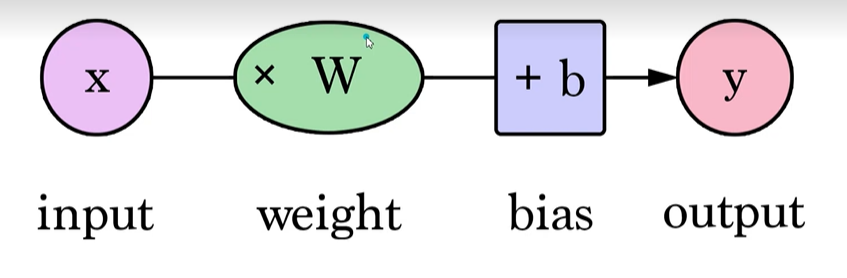

## 🩺 Project 1: Patient Survival Prediction

## 🧾**Description:** 

Getting a rapid understanding of the context of a patient’s overall health has been particularly important during the COVID-19 pandemic as healthcare workers around the world struggle with hospitals overloaded by patients in critical condition. Intensive Care Units (ICUs) often lack verified medical histories for incoming patients. A patient in distress or a patient who is brought in confused or unresponsive may not be able to provide information about chronic conditions such as heart disease, injuries, or diabetes. Medical records may take days to transfer, especially for a patient from another medical provider or system. Knowledge about chronic conditions can inform clinical decisions about patient care and ultimately improve patient's survival outcomes.

source of dataset - https://journals.lww.com/ccmjournal/Citation/2019/01001/33__THE_GLOBAL_OPEN_SOURCE_SEVERITY_OF_ILLNESS.36.aspx

## 🧭 Problem Statement: 

* The target feature is **hospital_death** which is a binary variable. 

* The task is to classify this variable based on the other 84 features step-by-step by going through each day's task. 

##Scoring Metric
* Accuracy/Area under ROC curve.

## Read the data

In [4]:
df = pd.read_csv(file_path)
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


## Data Summary

In [5]:
df.shape

(91713, 186)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


## Check for Null Values

In [7]:
missing_values = df.isnull().sum()[df.isnull().sum() > 0].to_dict()

In [8]:
missing_values_percent = (df.isnull().sum()[df.isnull().sum() > 0]/df.shape[0] *100.0).to_dict()

In [9]:
cols_missing_ge_75 = []
for k,v in missing_values_percent.items():
  if v >= 75.0:
    cols_missing_ge_75.append(k)

## Analyze Columns having > 75% missing Values

In [10]:
for col in cols_missing_ge_75:
  print(f'% missing values associated with {col} column : {missing_values_percent[col]}')

% missing values associated with fio2_apache column : 77.27148822958577
% missing values associated with paco2_apache column : 77.27148822958577
% missing values associated with paco2_for_ph_apache column : 77.27148822958577
% missing values associated with pao2_apache column : 77.27148822958577
% missing values associated with ph_apache column : 77.27148822958577
% missing values associated with h1_diasbp_invasive_max column : 81.69834156553597
% missing values associated with h1_diasbp_invasive_min column : 81.69834156553597
% missing values associated with h1_mbp_invasive_max column : 81.60675149651631
% missing values associated with h1_mbp_invasive_min column : 81.60675149651631
% missing values associated with h1_sysbp_invasive_max column : 81.68416691199721
% missing values associated with h1_sysbp_invasive_min column : 81.68416691199721
% missing values associated with h1_albumin_max column : 91.39816601790368
% missing values associated with h1_albumin_min column : 91.39816601

## Dropping Columns which have >75 % missing Values

In [11]:
new_df = df.copy()
new_df = new_df.drop(cols_missing_ge_75,axis=1)

In [13]:
new_df.shape,df.shape

((91713, 141), (91713, 186))

## Analyze Categorical columns

In [15]:
cat_cols = new_df.select_dtypes(include='object').columns

In [16]:
cat_cols

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [17]:
for col in cat_cols:
  print(col)
  print("="*80)
  print(f"Unique Values : {df[col].unique()}")
  print("="*80)
  print(f"value counts :\n{df[col].value_counts(normalize=True,dropna=False)}")
  print("\n")

ethnicity
Unique Values : ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']
value counts :
Caucasian           0.770709
African American    0.104096
Other/Unknown       0.047692
Hispanic            0.041390
NaN                 0.015210
Asian               0.012310
Native American     0.008592
Name: ethnicity, dtype: float64


gender
Unique Values : ['M' 'F' nan]
value counts :
M      0.539389
F      0.460338
NaN    0.000273
Name: gender, dtype: float64


hospital_admit_source
Unique Values : ['Floor' 'Emergency Department' 'Operating Room' nan 'Direct Admit'
 'Other Hospital' 'Other ICU' 'ICU to SDU' 'Recovery Room'
 'Chest Pain Center' 'Step-Down Unit (SDU)' 'Acute Care/Floor' 'PACU'
 'Observation' 'ICU' 'Other']
value counts :
Emergency Department    0.403018
NaN                     0.233435
Operating Room          0.106713
Floor                   0.087828
Direct Admit            0.070230
Recovery Room           0.031577
Acute Care/Floor      

## Imputing missing categorical columns

In [18]:
for col in cat_cols:
  new_df[col] = new_df[col].fillna('missing')

## Check if missing values in the categorical columns have been imputed

In [19]:
new_df[cat_cols].isnull().sum()[new_df[cat_cols].isnull().sum() > 0]

Series([], dtype: int64)

In [20]:
numeric_missing = (new_df.isnull().sum()[new_df.isnull().sum() > 0]/new_df.shape[0] * 100).to_dict()

In [21]:
numeric_missing_ge_50 = [k for k,v in numeric_missing .items() if v >= 50.0]

In [22]:
numeric_missing_ge_50

['albumin_apache',
 'bilirubin_apache',
 'urineoutput_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_albumin_max',
 'd1_albumin_min',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'd1_inr_max',
 'd1_inr_min',
 'd1_lactate_max',
 'd1_lactate_min',
 'h1_glucose_max',
 'h1_glucose_min',
 'h1_inr_max',
 'h1_inr_min',
 'd1_arterial_pco2_max',
 'd1_arterial_pco2_min',
 'd1_arterial_ph_max',
 'd1_arterial_ph_min',
 'd1_arterial_po2_max',
 'd1_arterial_po2_min',
 'd1_pao2fio2ratio_max',
 'd1_pao2fio2ratio_min']

## Dropping numeric Columns having ge 50 % missing values

In [23]:
new_df = new_df.drop(numeric_missing_ge_50,axis=1)
new_df.shape

(91713, 112)

In [24]:
null_cols = [col for col in new_df.isnull().sum()[new_df.isnull().sum() > 0].to_dict().keys()]

In [25]:
null_cols

['age',
 'bmi',
 'height',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'arf_apache',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 '

In [26]:
new_df = new_df[~ (new_df['gender'] == 'missing')]

In [27]:
new_df.shape

(91688, 112)

In [28]:
new_df['gender'].unique()

array(['M', 'F'], dtype=object)

In [29]:
new_df[(new_df['solid_tumor_with_metastasis'].isnull()) & (new_df['gender'] == 'F')]

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
350,87626,122044,118,0,NaN,44.969557,0,Caucasian,F,154.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
968,99457,58952,118,0,NaN,NaN,0,Caucasian,F,162.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
1104,64313,74279,118,0,NaN,24.457311,0,African American,F,167.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
1660,121671,15927,77,0,NaN,45.050978,0,Caucasian,F,165.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
1964,53121,63323,118,0,NaN,24.946795,0,Caucasian,F,165.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91499,128966,73267,183,0,NaN,26.485540,0,Caucasian,F,153.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
91567,43987,67116,184,0,NaN,41.815650,0,Caucasian,F,163.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
91597,22339,90132,183,1,NaN,30.470522,0,Caucasian,F,168.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing
91625,49553,18923,6,0,NaN,21.947625,0,Caucasian,F,157.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,missing


In [30]:
male_df = new_df[(new_df['gender'] == 'F')]
female_df = new_df[(new_df['gender'] == 'M')]
for col in null_cols:
  male_df[col] = male_df[col].fillna(male_df[col].mean())
  female_df[col] = female_df[col].fillna(female_df[col].mean())
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [31]:
female_df[(female_df['solid_tumor_with_metastasis'].isnull()) & (female_df['gender'] == 'M')]

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem


In [32]:
final_df = pd.concat([male_df,female_df],axis=0)

In [33]:
final_df.shape

(91688, 112)

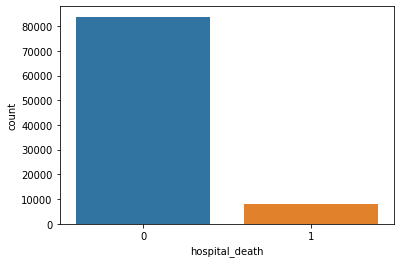

In [34]:
sns.countplot(x='hospital_death',data=final_df)
plt.show()

* Dataset is imbalanced

In [35]:
final_df.isnull().sum()[final_df.isnull().sum() > 0]

Series([], dtype: int64)

* All Null values have been imputed

## Save the processed datasets

In [36]:
file_path

'/content/drive/MyDrive/TMLC/Patient_Survival_Detection/Dataset.csv'

In [37]:
final_df.to_csv("/content/drive/MyDrive/TMLC/Patient_Survival_Detection/Processed_Dataset.csv",index=False)

In [4]:
final_df = pd.read_csv("/content/drive/MyDrive/TMLC/Patient_Survival_Detection/Processed_Dataset.csv")

In [5]:
final_df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
1,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
2,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
3,82208,49526,83,0,59.0,57.450000,0,Caucasian,F,165.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
4,105427,125898,77,0,72.0,28.257052,1,Hispanic,F,154.9,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory


## Label Encoding

In [6]:
final_df.select_dtypes(include='object')

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
1,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
2,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
3,Caucasian,F,Operating Room,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory
4,Hispanic,F,Operating Room,Operating Room / Recovery,admit,Med-Surg ICU,Respiratory,Respiratory
...,...,...,...,...,...,...,...,...
91683,Caucasian,M,Direct Admit,Accident & Emergency,admit,Cardiac ICU,Metabolic,Metabolic
91684,African American,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
91685,Native American,M,Direct Admit,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular
91686,Caucasian,M,Acute Care/Floor,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular


In [9]:
cat_cols = final_df.select_dtypes(include='object').columns

In [10]:
df_dummies = pd.get_dummies(final_df[cat_cols])

In [11]:
df_dummies

,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,ethnicity_missing,gender_F,gender_M,hospital_admit_source_Acute Care/Floor,...,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,apache_2_bodysystem_missing
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91683,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
91684,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
91685,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
91686,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
final_df = pd.concat([df_dummies,final_df],axis=1)

In [13]:
final_df.head()

,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,ethnicity_missing,gender_F,gender_M,hospital_admit_source_Acute Care/Floor,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,0,1,0,0,0,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
1,0,0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
2,0,0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
3,0,0,1,0,0,0,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
4,0,0,0,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory


In [14]:
train_df = final_df.drop(cat_cols,axis=1)

In [15]:
train_df.shape

(91688, 169)

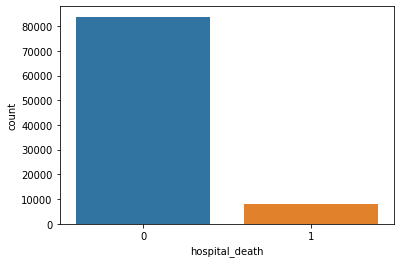

In [16]:
sns.countplot(x='hospital_death',data=train_df)
plt.show()

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X = train_df.drop('hospital_death',axis=1)
y = train_df['hospital_death']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

In [19]:
np.unique(y_train)

array([0, 1])

In [20]:
np.unique(y_test)

array([0, 1])

## Normalize the data

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [22]:
X_train_scaled.shape,X_test_scaled.shape

((73350, 168), (18338, 168))

## Import Keras packages

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [56]:
X_train.shape,X_test.shape

((73350, 168), (18338, 168))

## Build Neural Network

In [58]:
model = Sequential()
model.add(Dense(64, input_dim=168, activation= 'relu' ))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(8,  activation= 'relu' ))
model.add(Dense(1,  activation= 'sigmoid' ))

## KerasEvaluation Metrics

In [24]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Compile the model

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

In [25]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)

In [26]:
class_weight

array([0.54719205, 5.79750237])

## Train and Evaluate the Model

In [63]:
history = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test),epochs=100, batch_size=32,class_weight={0:class_weight[0],1:2})

Epoch 1/100
2293/2293 [==============================] - 12s 4ms/step - loss: 0.2584 - accuracy: 0.8844 - f1_m: 0.4144 - precision_m: 0.3892 - recall_m: 0.5291 - val_loss: 0.2388 - val_accuracy: 0.9077 - val_f1_m: 0.4351 - val_precision_m: 0.4540 - val_recall_m: 0.4925
Epoch 2/100
2293/2293 [==============================] - 8s 4ms/step - loss: 0.2338 - accuracy: 0.8986 - f1_m: 0.4683 - precision_m: 0.4416 - recall_m: 0.5894 - val_loss: 0.2763 - val_accuracy: 0.8861 - val_f1_m: 0.4466 - val_precision_m: 0.3940 - val_recall_m: 0.6133
Epoch 3/100
2293/2293 [==============================] - 9s 4ms/step - loss: 0.2253 - accuracy: 0.9002 - f1_m: 0.4665 - precision_m: 0.4388 - recall_m: 0.5826 - val_loss: 0.2671 - val_accuracy: 0.8886 - val_f1_m: 0.4502 - val_precision_m: 0.3972 - val_recall_m: 0.6157
Epoch 4/100
2293/2293 [==============================] - 8s 4ms/step - loss: 0.2172 - accuracy: 0.9043 - f1_m: 0.4916 - precision_m: 0.4573 - recall_m: 0.6228 - val_loss: 0.2405 - val_accuracy

## Training and Validation Accuracy Visualization


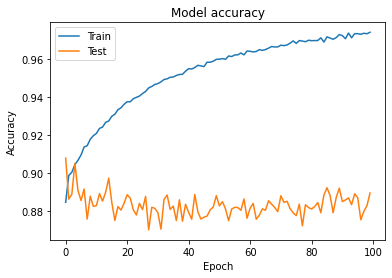

In [64]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

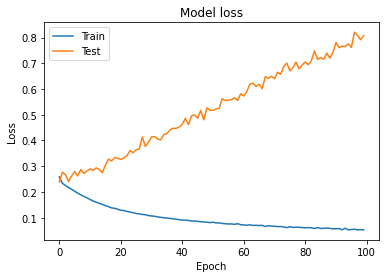

In [65]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

287/287 [==============================] - 0s 1ms/step


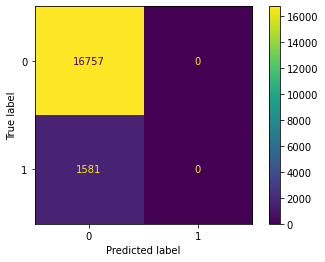

In [66]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

y_pred = model.predict(X_test_scaled, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_bool)

## Hyperparameter Tuning with KerasTuner with different optimization methods

https://towardsdatascience.com/hyperparameter-tuning-with-keras-tuner-283474fbfbe

In [69]:
print(tf.__version__)

2.8.0


In [28]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 3.8 MB/s 


In [45]:
import keras_tuner as kt
from tensorflow.keras import layers
from keras_tuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = Sequential()
        model.add(
            layers.Dense(
                units=hp.Int('units', 8, 64, 4, default=8),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=input_shape
            )
        )
        
        model.add(
            layers.Dense(
                units=hp.Int('units', 16, 64, 4, default=16),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu')
            )
        )
        
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )
        
        model.add(layers.Dense(1))
        
        model.compile(
            loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m]
        )
        
        return model

In [30]:
input_shape = (X_train.shape[1],)
hypermodel = RegressionHyperModel(input_shape)

## Random Search

In [31]:
tuner_rs = RandomSearch(
            hypermodel,
            objective='val_accuracy',
            seed=42,
            max_trials=10,
            executions_per_trial=2)

In [33]:
tuner_rs.search(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled,y_test), verbose=2)

Trial 10 Complete [00h 02m 45s]
val_accuracy: 0.9180117845535278

Best val_accuracy So Far: 0.9263823628425598
Total elapsed time: 00h 27m 07s
INFO:tensorflow:Oracle triggered exit


In [35]:
best_model.evaluate(X_test_scaled, y_test)

574/574 [==============================] - 3s 4ms/step - loss: 0.2706 - accuracy: 0.9270 - f1_m: 0.3244 - precision_m: 0.4785 - recall_m: 0.2777


[0.2705695629119873,
 0.9269822239875793,
 0.32441696524620056,
 0.47851333022117615,
 0.27772513031959534]

In [37]:
best_model = tuner_rs.get_best_models(num_models=1)[0]
loss, acc,f1_score,precision,recall = best_model.evaluate(X_test_scaled, y_test)

574/574 [==============================] - 2s 2ms/step - loss: 0.2706 - accuracy: 0.9270 - f1_m: 0.3244 - precision_m: 0.4785 - recall_m: 0.2777


In [42]:
loss, acc,f1_score,precision,recall

(0.2705695629119873,
 0.9269822239875793,
 0.32441696524620056,
 0.47851333022117615,
 0.27772513031959534)

In [66]:
best_hyperparameters_rs = tuner_rs.get_best_hyperparameters(1)[0]

In [96]:
best_hyperparameters_rs.get('units')

40

In [97]:
best_hyperparameters_rs.get('dense_activation')

'relu'

In [98]:
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hyperparameters_rs.get('units')} and the optimal learning rate for the optimizer
is {best_hyperparameters_rs.get('dense_activation')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 40 and the optimal learning rate for the optimizer
is relu.



## Train the model using best hyper parameters
* Find the optimal number of epochs to train the model with the hyperparameters obtained from the search.

In [99]:
model = tuner_rs.hypermodel.build(best_hyperparameters_rs)

In [100]:
history = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test),epochs=100, batch_size=32,class_weight={0:0.5,1:5})

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
2293/2293 [==============================] - 10s 4ms/step - loss: 1.0672 - accuracy: 0.7542 - f1_m: 0.2968 - precision_m: 0.2128 - recall_m: 0.6112 - val_loss: 0.6064 - val_accuracy: 0.7963 - val_f1_m: 0.3502 - val_precision_m: 0.2541 - val_recall_m: 0.6796
Epoch 2/100
2293/2293 [==============================] - 9s 4ms/step - loss: 0.7342 - accuracy: 0.7715 - f1_m: 0.3212 - precision_m: 0.2343 - recall_m: 0.6413 - val_loss: 0.5946 - val_accuracy: 0.7827 - val_f1_m: 0.3331 - val_precision_m: 0.2394 - val_recall_m: 0.6630
Epoch 3/100
2293/2293 [==============================] - 8s 4ms/step - loss: 0.5948 - accuracy: 0.8082 - f1_m: 0.3533 - precision_m: 0.2656 - recall_m: 0.6412 - val_loss: 0.5396 - val_accuracy: 0.8136 - val_f1_m: 0.3770 - val_precision_m: 0.2772 - val_recall_m: 0.7063
Epoch 4/100
2293/2293 [==============================] - 8s 4ms/step - loss: 0.5047 - accuracy: 0.8204 - f1_m: 0.3715 - precision_m: 0.2874 - recall_m: 0.6507 - val_loss: 0.5620 - val_accuracy

* Re-instantiate the hypermodel and train it with the optimal number of epochs from above.

In [101]:
hypermodel = tuner_rs.hypermodel.build(best_hyperparameters_rs)

# Retrain the model
history = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test),epochs=best_epoch , batch_size=32,class_weight={0:0.5,1:5})

Epoch 1/23
2293/2293 [==============================] - 9s 4ms/step - loss: 0.3401 - accuracy: 0.8174 - f1_m: 0.4498 - precision_m: 0.3161 - recall_m: 0.8962 - val_loss: 0.5353 - val_accuracy: 0.7885 - val_f1_m: 0.3615 - val_precision_m: 0.2572 - val_recall_m: 0.7329
Epoch 2/23
2293/2293 [==============================] - 8s 4ms/step - loss: 0.3545 - accuracy: 0.8230 - f1_m: 0.4504 - precision_m: 0.3184 - recall_m: 0.8852 - val_loss: 0.5476 - val_accuracy: 0.7949 - val_f1_m: 0.3665 - val_precision_m: 0.2618 - val_recall_m: 0.7302
Epoch 3/23
2293/2293 [==============================] - 8s 4ms/step - loss: 0.3528 - accuracy: 0.8251 - f1_m: 0.4536 - precision_m: 0.3217 - recall_m: 0.8851 - val_loss: 0.5455 - val_accuracy: 0.7892 - val_f1_m: 0.3610 - val_precision_m: 0.2566 - val_recall_m: 0.7300
Epoch 4/23
2293/2293 [==============================] - 9s 4ms/step - loss: 0.3439 - accuracy: 0.8246 - f1_m: 0.4569 - precision_m: 0.3245 - recall_m: 0.8945 - val_loss: 0.5482 - val_accuracy: 0.7

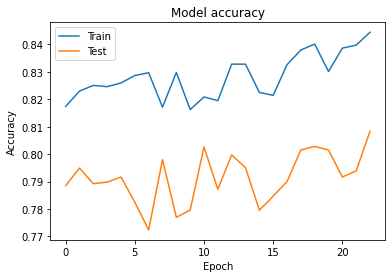

In [103]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

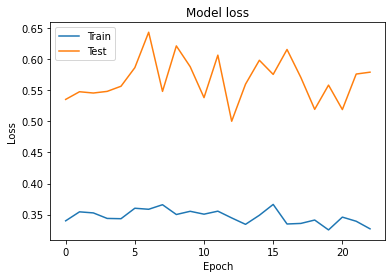

In [104]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

##  Evaluate the hypermodel on the test data.

In [105]:
eval_result = hypermodel.evaluate(X_test_scaled,y_test)

574/574 [==============================] - 3s 4ms/step - loss: 2.3832 - accuracy: 0.6135 - f1_m: 0.1471 - precision_m: 0.0955 - recall_m: 0.4036


In [106]:
eval_result

[2.383192777633667,
 0.6135347485542297,
 0.14706750214099884,
 0.09548529982566833,
 0.4036065936088562]

In [107]:
pred = hypermodel.predict(X_test_scaled)

In [108]:
predictions = np.argmax(pred,axis=1)

In [110]:
np.unique(predictions)

array([0])

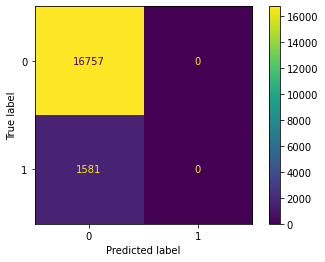

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,predictions)

## Build, Run and Evaluate Hyperband Tuner

In [46]:
tuner_hb = Hyperband(
            hypermodel,
            max_epochs=5,
            objective='val_accuracy',
            seed=42,
            executions_per_trial=2,
            directory='hb'
        )

tuner_hb.search(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled,y_test), verbose=0)

INFO:tensorflow:Oracle triggered exit


In [52]:
best_model = tuner_hb.get_best_models(num_models=1)[0]

In [56]:
hb_loss,hb_acc,hb_f1,hb_pre,hb_rec = best_model.evaluate(X_test_scaled,y_test)

574/574 [==============================] - 2s 4ms/step - loss: 0.2462 - accuracy: 0.9226 - f1_m: 0.2502 - precision_m: 0.3892 - recall_m: 0.2069


In [57]:
hb_loss,hb_acc,hb_f1,hb_pre,hb_rec

(0.2462044060230255,
 0.9225651621818542,
 0.25024503469467163,
 0.3892276883125305,
 0.20693339407444)

In [65]:
best_hyperparameters = tuner_hb.get_best_hyperparameters(1)[0]

In [113]:
best_hyperparameters.get('units')

12

In [114]:
best_hyperparameters.get('dense_activation')

'sigmoid'

## Build, Run and Evaluate Bayesian Optimization Tuner

In [121]:
input_shape = (X_train.shape[1],)
hypermodel = RegressionHyperModel(input_shape)

In [125]:
tuner_bo = BayesianOptimization(
            hypermodel,
            objective='val_accuracy',
            max_trials=10,
            seed=42,
            executions_per_trial=2,
            directory='bo'
        )

INFO:tensorflow:Reloading Oracle from existing project bo/untitled_project/oracle.json


INFO:tensorflow:Reloading Oracle from existing project bo/untitled_project/oracle.json


In [127]:
tuner_bo.search(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled,y_test), verbose=1)

Trial 10 Complete [00h 03m 49s]
val_accuracy: 0.9189388155937195

Best val_accuracy So Far: 0.9255643784999847
Total elapsed time: 00h 42m 29s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [130]:
best_model = tuner_bo.get_best_models(num_models=1)[0]
best_model.evaluate(X_test_scaled, y_test)[1]

574/574 [==============================] - 2s 3ms/step - loss: 0.2071 - accuracy: 0.9263 - f1_m: 0.3157 - precision_m: 0.4654 - recall_m: 0.2695


0.9262732863426208

In [133]:
best_hyperparameters_bo = tuner_bo.get_best_hyperparameters(1)[0]

In [135]:
best_hyperparameters_bo.get('units')

8

In [136]:
best_hyperparameters_bo.get('dropout')

0.1

In [137]:
best_hyperparameters_bo.get('dense_activation')

'relu'

## How to Tune the Number of Neurons in the Hidden Layer

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/